### Problem Statement

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#!pip install mlxtend
from mlxtend.preprocessing import transactionencoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
books = pd.read_csv('book.csv')
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
books.shape

(2000, 11)

###### Data preprocessing not required as it is already in transaction format

### Apriori Algorithm

##### min_support = 0.1, confidence = 0.7

In [13]:
frequent_items = apriori(books, min_support = 0.1, use_colnames = True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [14]:
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
7,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083


In [15]:
## A leverage value of 0 indicates independence. Range will be [-1 1]
## A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [20]:
rules.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
16,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
17,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
15,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
18,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
5,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
14,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158


In [22]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
7,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
10,"(ChildBks, ArtBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403
13,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081
14,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446


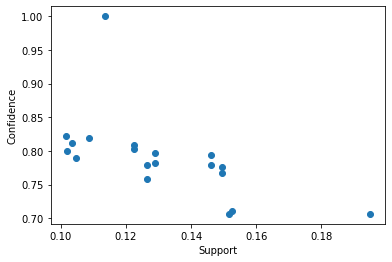

In [24]:
#Visualization of abtained rules 
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

##### min_support = 0.05, confidence = 0.8

In [38]:
frequent_items = apriori(books, min_support = 0.05, use_colnames = True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, CookBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, YouthBks, ArtBks, GeogBks)"
97,0.0650,"(DoItYBks, CookBks, ArtBks, GeogBks)"
98,0.0510,"(CookBks, GeogBks, ChildBks, DoItYBks, YouthBks)"


In [39]:
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
57,"(DoItYBks, ArtBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(DoItYBks, CookBks, YouthBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
59,"(ChildBks, DoItYBks, YouthBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
60,"(DoItYBks, CookBks, ArtBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


In [40]:
rules.sort_values(by = 'confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
15,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf
49,"(ChildBks, ItalCook, GeogBks)",(CookBks),0.0525,0.431,0.0525,1.000000,2.320186,0.029872,inf
6,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
23,"(ItalCook, GeogBks)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
...,...,...,...,...,...,...,...,...,...
5,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
12,"(YouthBks, RefBks)",(CookBks),0.0965,0.431,0.0775,0.803109,1.863362,0.035908,2.889921
43,"(ChildBks, ArtBks, RefBks)",(CookBks),0.0760,0.431,0.0610,0.802632,1.862254,0.028244,2.882933
13,"(YouthBks, ArtBks)",(CookBks),0.1010,0.431,0.0810,0.801980,1.860743,0.037469,2.873450


In [41]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>2.3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
6,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
15,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf
19,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
22,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf
23,"(ItalCook, GeogBks)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
49,"(ChildBks, ItalCook, GeogBks)",(CookBks),0.0525,0.431,0.0525,1.000000,2.320186,0.029872,inf
51,"(ItalCook, GeogBks)","(ChildBks, CookBks)",0.0640,0.256,0.0525,0.820312,3.204346,0.036116,4.140522


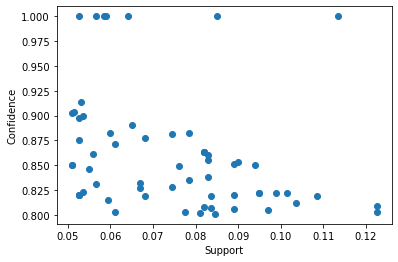

In [42]:
#Visualization of abtained rules 
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()